In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

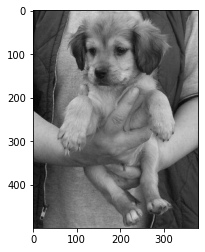

In [11]:
TRAIN_DIR = "datasets/train/"
VAL_DIR="datasets/val/"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAIN_DIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [12]:
print(img_array)

[[ 30  34  26 ... 185 189 191]
 [ 30  33  25 ... 186 188 190]
 [ 29  32  23 ... 188 188 189]
 ...
 [ 32  31  31 ...  53  54  55]
 [ 30  29  28 ...  54  55  56]
 [ 32  31  30 ...  55  56  57]]


In [13]:
print(img_array.shape)

(500, 380)


In [15]:
image_size = (180, 180)
batch_size = 20

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
from tensorflow import keras
from tensorflow.keras import layers
#data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

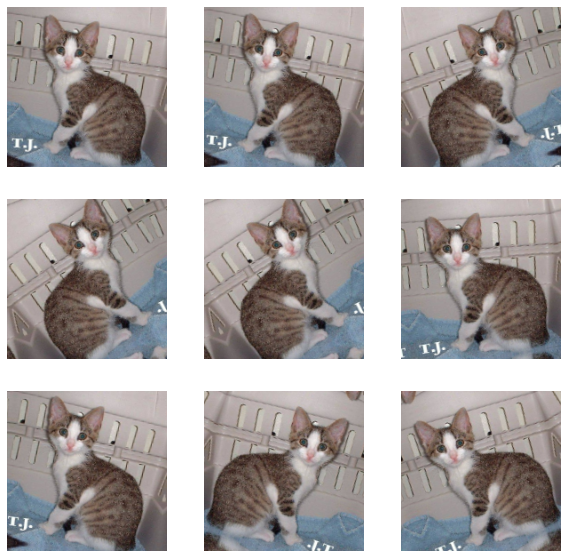

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [28]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)